In this notebook we will be using the [Keras](https://keras.io/) library to build and train a convolutional neural network (CNN) to classify images of handwritten digits from the [MNIST database](http://yann.lecun.com/exdb/mnist/) into their correct categories (0-9).

The code you provided outlines the process of building, training, evaluating, and using a Convolutional Neural Network (CNN) for classifying handwritten digits from the MNIST database using the Keras library in Python. Here's a breakdown of the key components and the theory behind how it works:

1. **Import Libraries**: Essential Python libraries such as NumPy, Matplotlib, and Keras are imported. NumPy is used for numerical operations, Matplotlib for plotting, and Keras is a high-level neural networks API.

2. **Load Data**: The MNIST dataset, which consists of 28x28 pixel grayscale images of handwritten digits (0-9), is loaded. This dataset is commonly used for training and testing in the field of machine learning.

3. **Data Visualization and Preprocessing**: The code visualizes some of the images in the dataset. The data is then reshaped to fit the model's input requirements and normalized. Normalization (dividing by 255) scales pixel values to the range [0, 1], improving training efficiency.

4. **Build the CNN Model**: The Sequential model from Keras is used to build the CNN. It consists of:
   - A Conv2D layer for convolution operations, extracting features from the input images.
   - MaxPooling2D for downsampling, reducing the spatial dimensions.
   - Flatten layer to convert the 2D feature maps into a 1D vector.
   - Dense layers (fully connected layers), including one with a ReLU activation function and another with a softmax activation function for classification.
   - Dropout layer to reduce overfitting.

5. **Compile the Model**: The model is compiled with the Adam optimizer, sparse categorical crossentropy as the loss function (suitable for multi-class classification), and accuracy as the metric.

6. **Train the Model**: The model is trained on the training data for a specified number of epochs.

7. **Evaluate the Model**: The trained model is evaluated using the test data to check its performance.

8. **Make Predictions**: The model is used to predict the classes of new, unseen data. The predictions are compared against the actual labels to visually assess the model's performance.

Regarding Variational Bayesian Inference, this code does not implement or use any aspects of Variational Bayesian methods. Variational Bayesian methods are a family of techniques in Bayesian statistics that approximate probability distributions through optimization, often used in complex probabilistic models. The CNN implemented here is a deterministic model and doesn't involve Bayesian inference or its variational techniques.

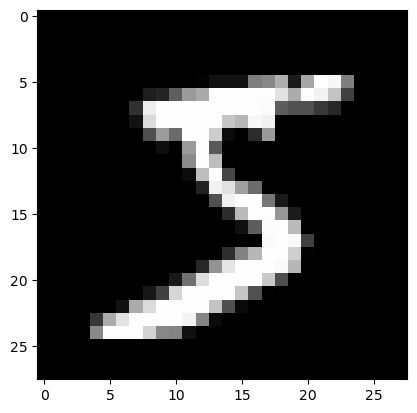

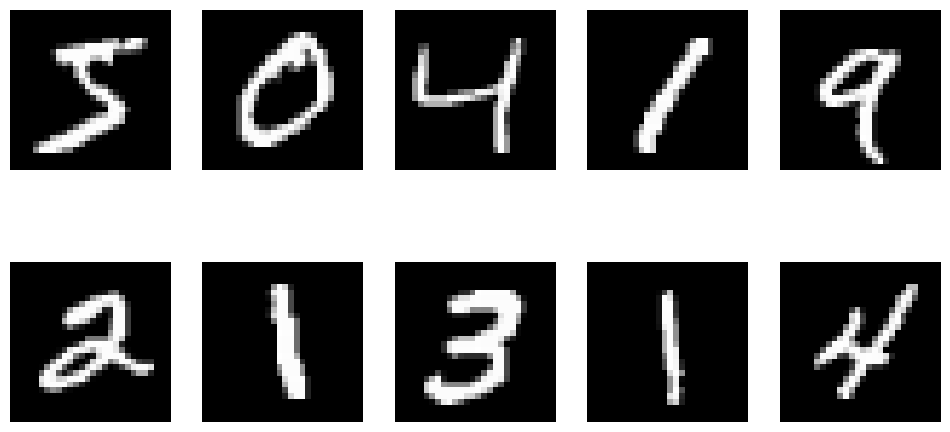

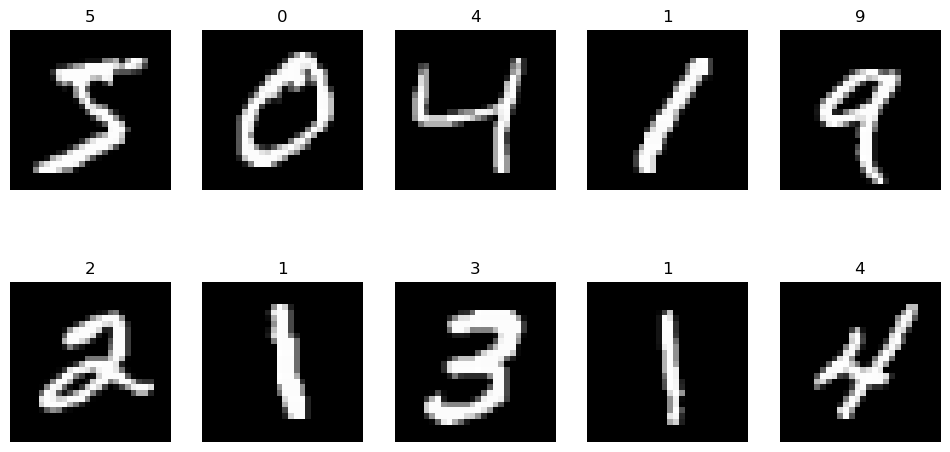

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2064 - accuracy: 0.9378
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0847 - accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0567 - accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0430 - accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0354 - accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0290 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0249 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0199 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0197 - accuracy: 0.9934
Epoch 10/10
313/313 [==============================] - 0s 923us/step
7


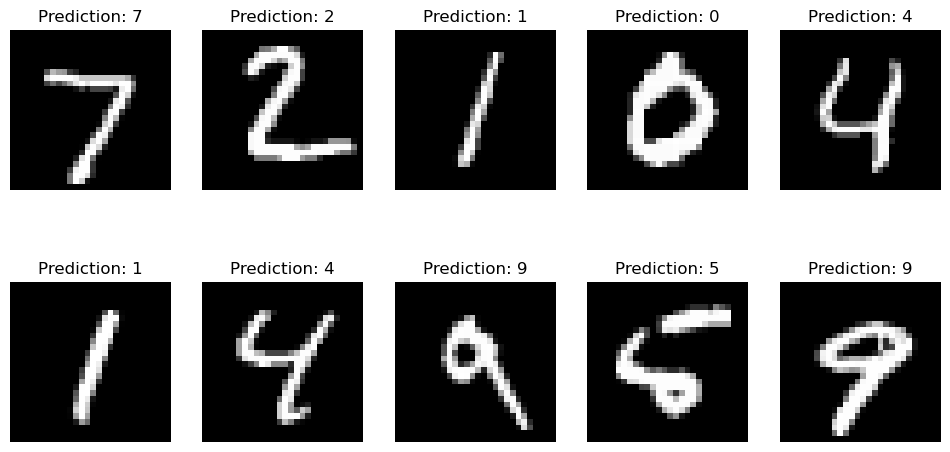

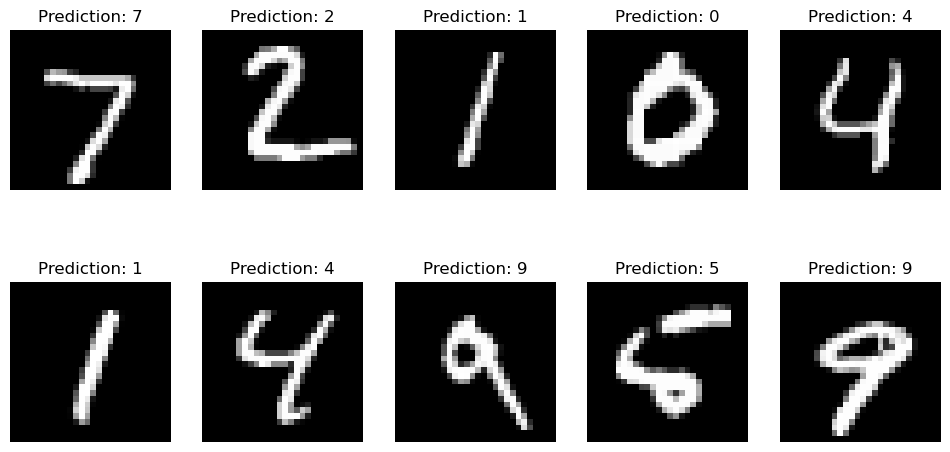

In [1]:
# in this notebook we will be using the keras library to build and train a convolutional neural network (cnn) to classify images of handwritten digits from the mnist database into their correct categories (0-9).

# ## Import Libraries

# In[1]:

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# ## Load Data

# In[2]:

# load the mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot the first image in the dataset
plt.imshow(X_train[0], cmap='gray')
plt.show()

# plot the first 10 images in the dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
plt.show()

# plot the first 10 images in the dataset with their labels
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))
    ax.axis('off')
plt.show()

# reshape the data to fit the model
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0


# ## Build Model

# In[3]:

# define the model

model = Sequential()

model.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # Flattening the 2D arrays for fully connected layers

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

# compile the model

model.compile(optimizer='adam',
              
                loss='sparse_categorical_crossentropy',
                
                metrics=['accuracy'])

# ## Train Model

# In[4]:

# train the model

model.fit(X_train, y_train, epochs=10)

# ## Evaluate Model

# In[5]:

# evaluate the model

model.evaluate(X_test, y_test)

# ## Predictions

# In[6]:

# make predictions

predictions = model.predict(X_test)

# print our model's predictions

print(np.argmax(predictions[0]))

# In[7]:

# check our predictions against the ground truths

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Prediction: {np.argmax(predictions[i])}")
    ax.axis('off')
plt.show()

# In[8]:

# check our predictions against the ground truths

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Prediction: {np.argmax(predictions[i])}")
    ax.axis('off')
plt.show()





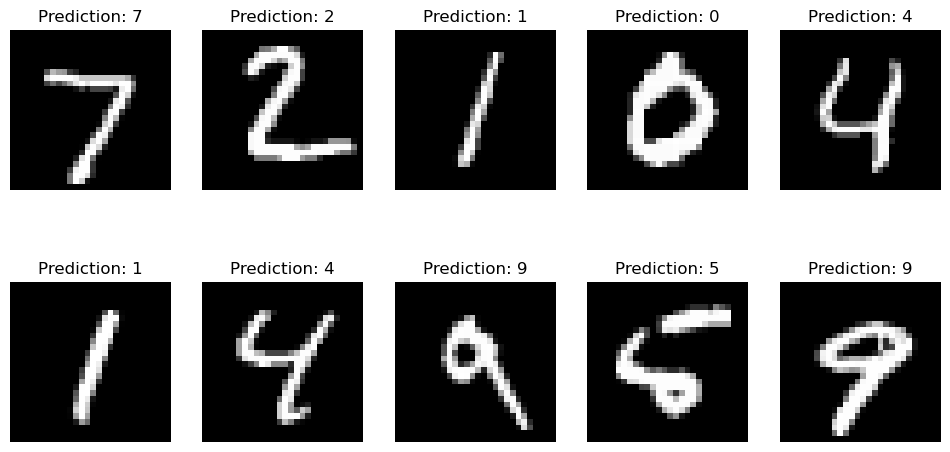

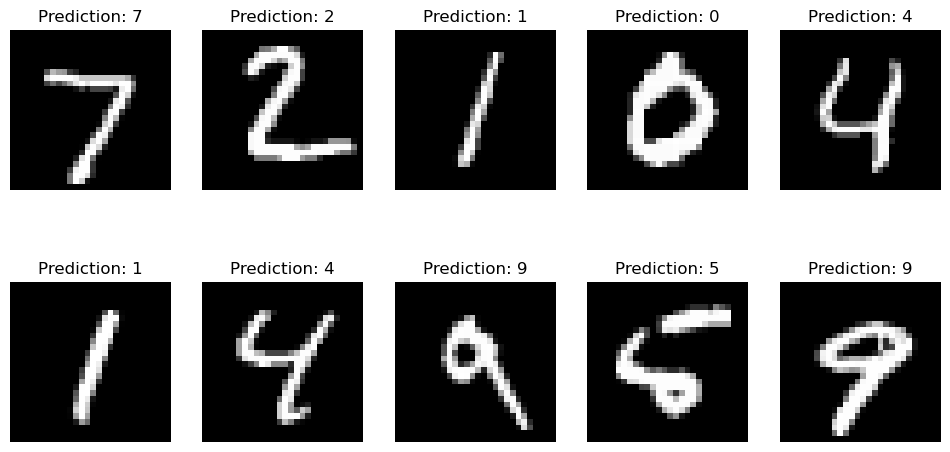

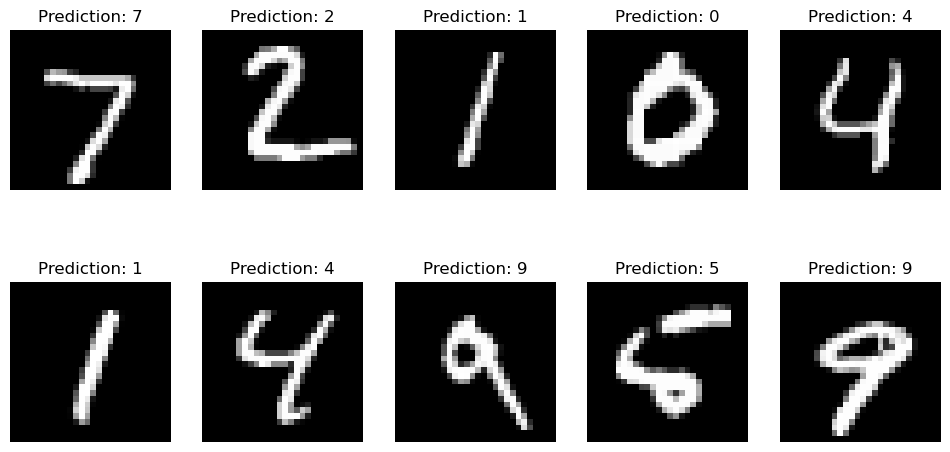

In [2]:
# In[9]:

# check our predictions against the ground truths

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Prediction: {np.argmax(predictions[i])}")
    ax.axis('off')
plt.show()

# In[10]:

# check our predictions against the ground truths

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Prediction: {np.argmax(predictions[i])}")
    ax.axis('off')
plt.show()

# In[11]:

# check our predictions against the ground truths

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Prediction: {np.argmax(predictions[i])}")
    ax.axis('off')
plt.show()

# In[12]:


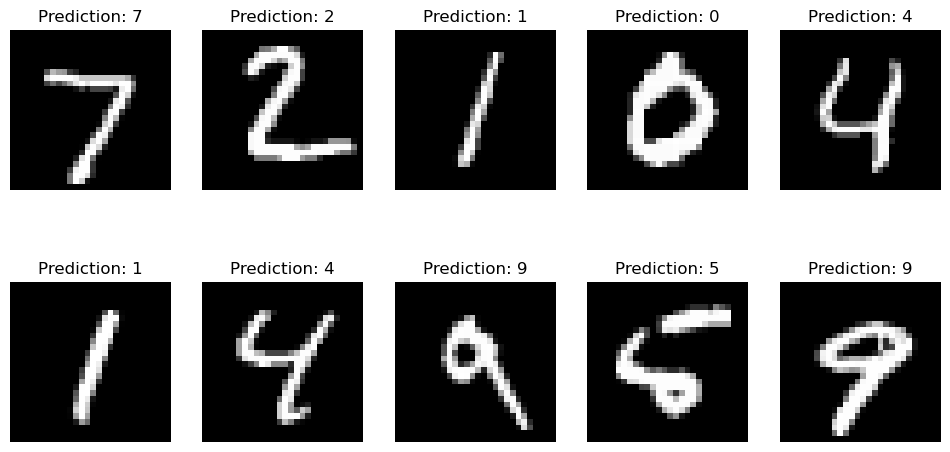

In [3]:
# check our predictions against the ground truths

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Prediction: {np.argmax(predictions[i])}")
    ax.axis('off')
plt.show()


In [4]:
import math

def distance_between_points(p1, p2):
    """Calculate the distance between two points in 2D."""
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

def midpoint(p1, p2):
    """Find the midpoint of a line segment defined by two points."""
    return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)

def slope(p1, p2):
    """Calculate the slope of a line given two points."""
    # Avoid division by zero
    if p1[0] == p2[0]:
        return float('inf')
    return (p2[1] - p1[1]) / (p2[0] - p1[0])

def line_equation(p1, p2):
    """Find the equation of the line passing through two points."""
    m = slope(p1, p2)
    # y = mx + b => b = y - mx
    b = p1[1] - m * p1[0]
    return f"y = {m}x + {b}"

# Example usage
point1 = (1, 2)
point2 = (4, 6)

print("Distance:", distance_between_points(point1, point2))
print("Midpoint:", midpoint(point1, point2))
print("Slope:", slope(point1, point2))
print("Line Equation:", line_equation(point1, point2))


Distance: 5.0
Midpoint: (2.5, 4.0)
Slope: 1.3333333333333333
Line Equation: y = 1.3333333333333333x + 0.6666666666666667


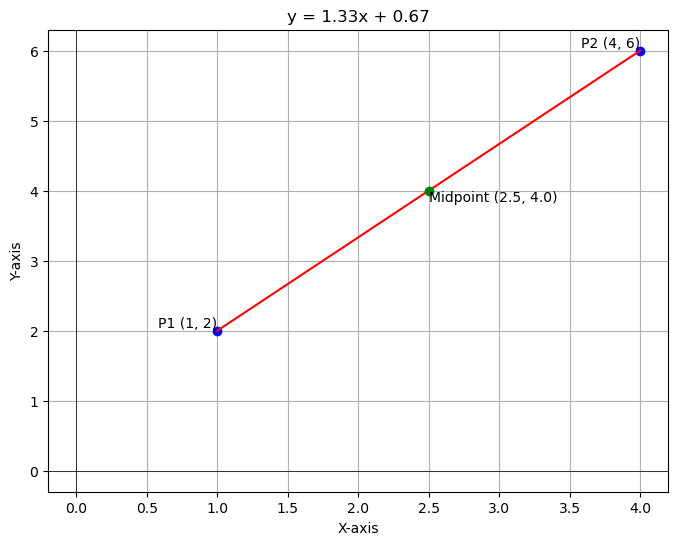

In [5]:
import matplotlib.pyplot as plt

def distance_between_points(p1, p2):
    """Calculate the distance between two points in 2D."""
    return ((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)**0.5

def midpoint(p1, p2):
    """Find the midpoint of a line segment defined by two points."""
    return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)

def slope(p1, p2):
    """Calculate the slope of a line given two points."""
    if p1[0] == p2[0]:
        return float('inf')
    return (p2[1] - p1[1]) / (p2[0] - p1[0])

def line_equation(p1, p2):
    """Find the equation of the line passing through two points."""
    m = slope(p1, p2)
    b = p1[1] - m * p1[0]
    return (m, b)

# Example usage
point1 = (1, 2)
point2 = (4, 6)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'bo')  # Points
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'r')   # Line

# Marking the midpoint
mid = midpoint(point1, point2)
plt.plot(mid[0], mid[1], 'go')  # Midpoint

# Adding labels
plt.text(point1[0], point1[1], f'P1 {point1}', verticalalignment='bottom', horizontalalignment='right')
plt.text(point2[0], point2[1], f'P2 {point2}', verticalalignment='bottom', horizontalalignment='right')
plt.text(mid[0], mid[1], f'Midpoint {mid}', verticalalignment='top', horizontalalignment='left')

# Line equation
m, b = line_equation(point1, point2)
line_label = f"y = {m:.2f}x + {b:.2f}"
plt.title(line_label)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()
